In [1]:
#####################################################################################################
### Creator: Ricky Blake Manus
### Objective: Analysis of MNIST Dataset to accurately classify and predict the value of 
### hand written digits ranging from 0-9 from a 28x28 Pixel source image
###
### MNIST Dataset & Testing Data obtained from Kaggle.com
### Data and Competition can be found at https://www.kaggle.com/c/digit-recognizer/overview
####################################################################################################

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

%matplotlib inline
warnings.filterwarnings('ignore')
###Notebook Options
pd.set_option('display.max_columns', 500)

In [3]:
### Import CSV Training and Testing Data, noting the layout and columns of the dataset
test_data = pd.read_csv('data-sets/test.csv')
train_data = pd.read_csv('data-sets/train.csv')

#Remove the labels and move them to a separate numpy array
Y_train = train_data['label']
X_train = train_data.drop(labels = ["label"],axis = 1)

train_data.head(5)

### The resulting dataframe contains 785 columns, and 42000 Rows
### 1 label column which contains the represented digit, moved to a numpy array
### 784 Pixel columns that represent the grayscale value of that pixel from 0-255 (inclusive)
### Each image is represented by 28x28 pixel image (784 Pixels)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,...,pixel534,pixel535,pixel536,pixel537,pixel538,pixel539,pixel540,pixel541,pixel542,pixel543,pixel544,pixel545,pixel546,pixel547,pixel548,pixel549,pixel550,pixel551,pixel552,pixel553,pixel554,pixel555,pixel556,pixel557,pixel558,pixel559,pixel560,pixel561,pixel562,pixel563,pixel564,pixel565,pixel566,pixel567,pixel568,pixel569,pixel570,pixel571,pixel572,pixel573,pixel574,pixel575,pixel576,pixel577,pixel578,pixel579,pixel580,pixel581,pixel582,pixel583,pixel584,pixel585,pixel586,pixel587,pixel588,pixel589,pixel590,pixel591,pixel592,pixel593,pixel594,pixel595,pixel596,pixel597,pixel598,pixel599,pixel600,pixel601,pixel602,pixel603,pixel604,pixel605,pixel606,pixel607,pixel608,pixel609,pixel610,pixel611,pixel612,pixel613,pixel614,pixel615,pixel616,pixel617,pixel618,pixel619,pixel620,pixel621,pixel622,pixel623,pixel624,pixel625,pixel626,pixel627,pixel628,pixel629,pixel630,pixel631,pixel632,pixel633,pixel634,pixel635,pixel636,pixel637,pixel638,pixel639,pixel640,pixel641,pixel642,pixel643,pixel644,pixel645,pixel646,pixel647,pixel648,pixel649,pixel650,pixel651,pixel652,pixel653,pixel654,pixel655,pixel656,pixel657,pixel658,pixel659,pixel660,pixel661,pixel662,pixel663,pixel664,pixel665,pixel666,pixel667,pixel668,pixel669,pixel670,pixel671,pixel672,pixel673,pixel674,pixel675,pixel676,pixel677,pixel678,pixel679,pixel680,pixel681,pixel682,pixel683,pixel684,pixel685,pixel686,pixel687,pixel688,pixel689,pixel690,pixel691,pixel692,pixel693,pixel694,pixel695,pixel696,pixel697,pixel698,pixel699,pixel700,pixel701,pixel702,pixel703,pixel704,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712,pixel713,pixel714,pixel715,pixel716,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726,pixel727,pixel728,pixel729,pixel730,pixel731,pixel732,pixel733,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixe

Text(0.5, 1.0, 'Number of Digit Occurrences')

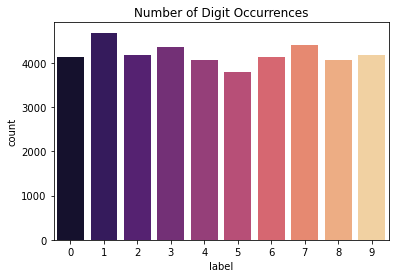

In [4]:
g = sns.countplot(Y_train, palette="magma")
plt.title("Number of Digit Occurrences")

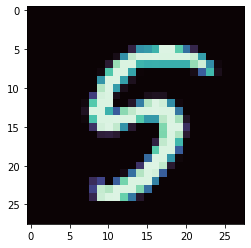

In [5]:
item = X_train.iloc[8].to_numpy()
item = item.reshape((28,28))
plt.imshow(item,cmap='mako')
plt.show()

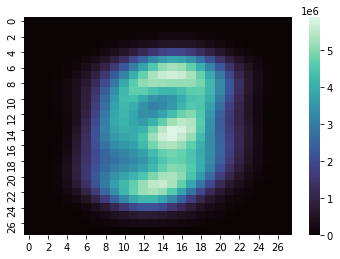

In [6]:
###The First the I wish to try is to create a heatmap of the data 
###    so that I can have a greater visualization of it.
###############################################################

#Grab the sum of the values
sum_data = X_train.sum(axis=0)

#Pass the sum data to heat_data as a numpy array,
#Parse the data into the proper 28x28 pixel format
heat_data = sum_data.to_numpy()
heat_data = heat_data.reshape(28, 28) 

ax = sns.heatmap(heat_data, cmap='mako')

In [7]:
# Label Encoding Y_train
Y_train = to_categorical(Y_train, num_classes = 10)

# Normalize the data & Reshape
X_train = X_train / 255.0
test_data = test_data / 255.0

X_train = X_train.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)

In [8]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [9]:
#Build the Model
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

##Same Padding is used to preserve original input volume as it decreses, input and output size are the same
##Max Pooling reduces the number of parameters and computration to control overfitting

In [10]:
# Adam Optimizater
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [11]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [12]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.10,  # randomly shift images horizontally 10%
        height_shift_range=0.10,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [13]:
# Fit the model
epochs = 10  # Optimized Epochs
## After tweaks to the generator (Primarily in width_shift, height_shift, and rotation_range), diminishing returns begin to happen after 10 epochs
batch_size = 250

history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size), epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
151/151 [==============================] - 7s 43ms/step - loss: 1.1298 - accuracy: 0.6220 - val_loss: 0.1982 - val_accuracy: 0.9488
Epoch 2/10
151/151 [==============================] - 7s 45ms/step - loss: 0.4013 - accuracy: 0.8734 - val_loss: 0.1121 - val_accuracy: 0.9683
Epoch 3/10
151/151 [==============================] - 6s 42ms/step - loss: 0.2864 - accuracy: 0.9107 - val_loss: 0.0910 - val_accuracy: 0.9726
Epoch 4/10
151/151 [==============================] - 6s 42ms/step - loss: 0.2467 - accuracy: 0.9246 - val_loss: 0.0782 - val_accuracy: 0.9769
Epoch 5/10
151/151 [==============================] - 6s 42ms/step - loss: 0.2171 - accuracy: 0.9330 - val_loss: 0.0680 - val_accuracy: 0.9798
Epoch 6/10
151/151 [==============================] - 6s 42ms/step - loss: 0.2015 - accuracy: 0.9388 - val_loss: 0.0638 - val_accuracy: 0.9821
Epoch 7/10
151/151 [==============================] - 6s 41ms/step

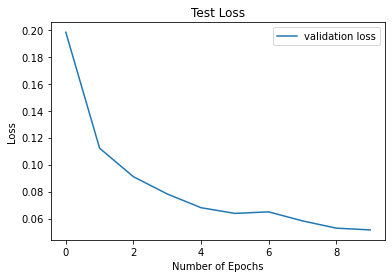

In [14]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
Y_pred = model.predict(test_data)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

In [16]:
data = []
cnn_pred_df = pd.DataFrame(data, columns=[])
cnn_pred_df['ImageId'] = range(1, 28000+1)
cnn_pred_df['Label'] = Y_pred_classes
#cnn_pred_df.style.hide_index()

In [17]:
cnn_pred_df.to_csv('cnn_prediction.csv', index=False)
## SVC Model that produces results of about ~78.2% Accuracy